# What are the most demanded skills for the top 3 most popular data roles?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vlad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df[df['job_country'] == 'Ukraine'].head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
275,Data Engineer,Інженер з договірної роботи,"Dnipro, Dnipropetrovsk Oblast, Ukraine",via RABOTA.ua,Full-time,False,Ukraine,2023-01-24 13:51:43,True,False,Ukraine,None,NaN,NaN,Vodafone Україна,None,None
524,Data Analyst,Data analyst,"Kyiv, Ukraine",via Robota.ua,Full-time,False,Ukraine,2023-07-11 13:47:33,True,False,Ukraine,None,NaN,NaN,"Fozzy Group, Логістика",None,None


In [3]:
df_UA = df[df['job_country'] == 'Ukraine']
df_skills = df_UA.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name = 'count')
df_skills_count.sort_values(by='count', ascending=False, inplace=True)
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
x = df_UA['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skill_perc = pd.merge(df_skills_count, x, how='left', on='job_title_short')
df_skill_perc['skill_percentage'] = (df_skill_perc['count'] / df_skill_perc['jobs_total'] * 100).round(2)
df_skill_perc



,job_skills,job_title_short,count,jobs_total,skill_percentage
0,python,Data Engineer,236,374,63.10
1,sql,Data Engineer,232,374,62.03
2,sql,Data Analyst,226,473,47.78
3,python,Data Analyst,139,473,29.39
4,aws,Data Engineer,134,374,35.83
...,...,...,...,...,...
787,clickup,Business Analyst,1,203,0.49
788,clojure,Software Engineer,1,259,0.39
789,codecommit,Data Engineer,1,374,0.27
790,cognos,Data Analyst,1,473,0.21


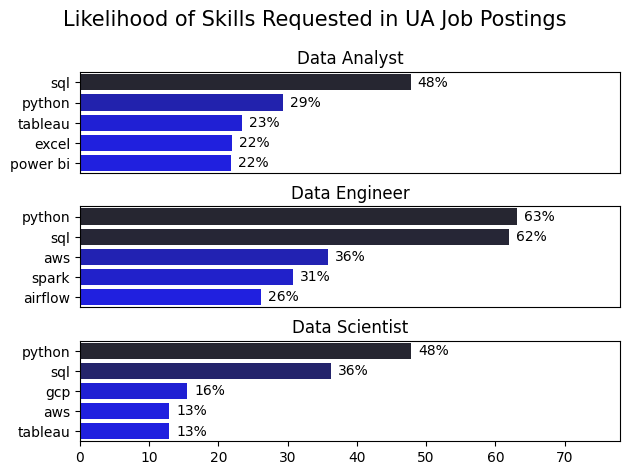

In [4]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], hue='count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in UA Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()